In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove2word2vec(glove_input_file="vectors.txt", word2vec_output_file="gensim_glove_vectors.txt")

(25538, 100)

In [5]:
from gensim.models.keyedvectors import KeyedVectors
glove_model = KeyedVectors.load_word2vec_format("gensim_glove_vectors.txt", binary=False)

In [3]:
glove_model.wv.most_similar("ace")

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('oncopole_avenue', 0.4746534526348114),
 ('melanonychia', 0.46443086862564087),
 ('hla-dq', 0.452335000038147),
 ('mrna_level', 0.44877150654792786),
 ('edn1', 0.43640559911727905),
 ('frap', 0.43061167001724243),
 ('moiety', 0.42898327112197876),
 ('jean-jacques', 0.42705288529396057),
 ('gstt1', 0.4263136386871338),
 ('d/d', 0.4243398904800415)]

In [4]:
len(glove_model.wv.vocab)

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


25538

In [20]:
with open("word_similarity_data", "a") as word_net:
    print(f"Source\tTarget", file = word_net)
    for word, vocab_obj in glove_model.wv.vocab.items():
        for simword, sim in glove_model.wv.most_similar(word, topn=20):
            print(f""+word+"\t"+simword, file = word_net)
        #print(f""+word+": "+str(glove_model.wv.most_similar(word, topn=20)), file = word_net)

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [5]:
with open("word_sim_nodes_mod10.csv", "a") as word_nodes:
    print(f"ID\tLabel", file = word_nodes)
    i = 1
    for word, vocab_obj in glove_model.wv.vocab.items():
        print(f""+str(i)+"\t"+word, file = word_nodes)
        i+=1

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [7]:
mydict = {}
i = 1
for word, vocab_obj in glove_model.wv.vocab.items():
    mydict[word] = i
    i+=1

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
with open("word_sim_edges_mod10.csv", "a") as word_edges:
    print(f"Source\tTarget\tWeight", file = word_edges)
    i = 1
    for word, vocab_obj in glove_model.wv.vocab.items():
        for simword, sim in glove_model.wv.most_similar(word, topn=10):
            print(f""+str(i)+"\t"+str(mydict.get(simword))+"\t"+str(round(sim, 3)), file = word_edges)
        i+=1

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [6]:
import sklearn.manifold
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [7]:
all_word_vectors_matrix = glove_model.wv.syn0
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


In [8]:
#plot the picture
import pandas as pd
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[glove_model.wv.vocab[word].index])
            for word in glove_model.wv.vocab
        ]
        
    ],
    columns=["word", "x", "y"]
)

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [86]:
points.head(125)

,word,x,y
0,vitiligo,-31.954742,-19.255121
1,patient,-31.826046,-19.478228
2,skin,-30.659796,-18.875170
3,author_information,-21.358644,36.057957
4,treatment,-31.596338,-20.608397
5,disease,-30.592102,-19.087906
6,study,-32.389263,-19.214697
7,result,-29.569607,-20.139277
8,university,-5.751708,36.895145
9,use,-32.475227,-19.227356


In [11]:
import seaborn as sns
sns.set_context("poster")

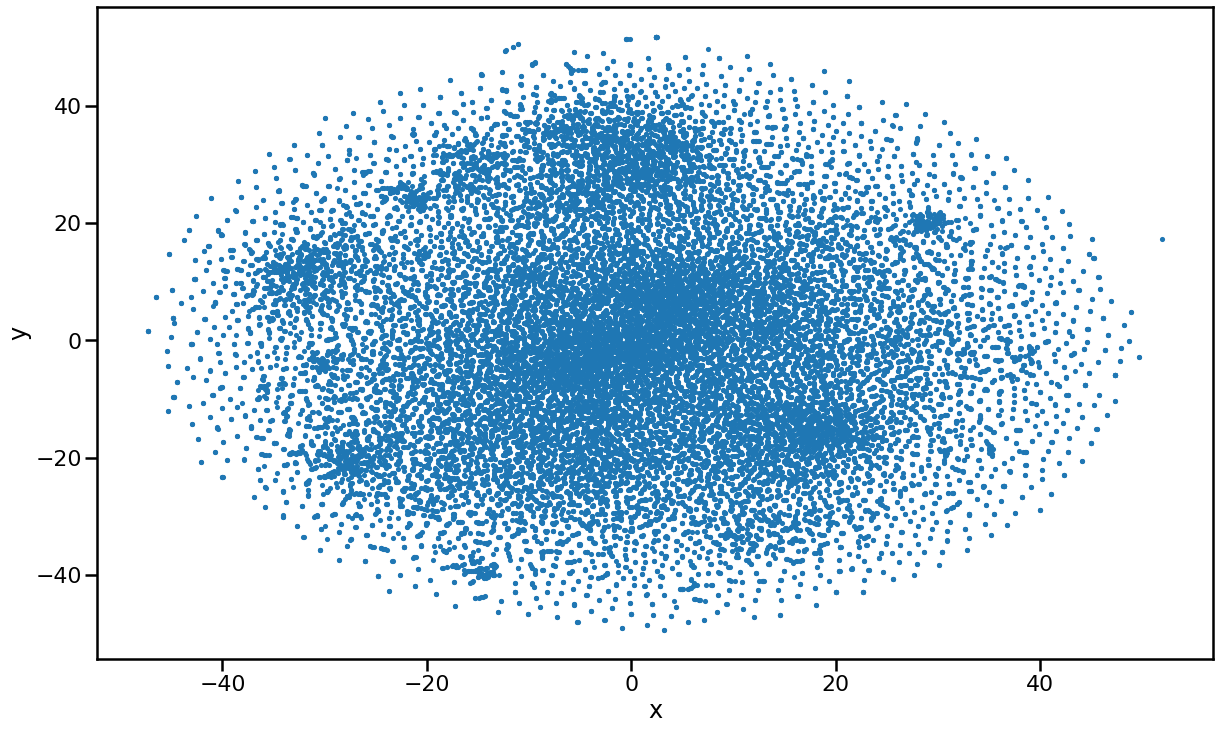

In [12]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [43]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.015, point.y + 0.015, point.word, fontsize=11)

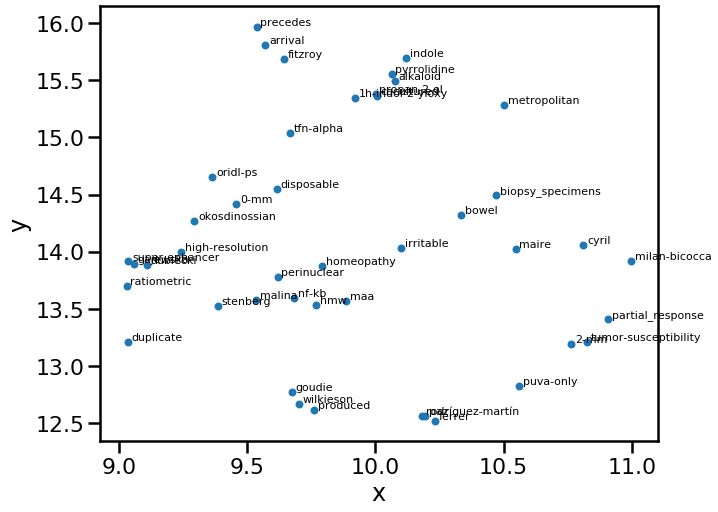

In [92]:
plot_region(x_bounds=(9.0, 11.0), y_bounds=(12.5, 16))

In [23]:
glove_model.most_similar("gene")

[('mutation', 0.6050093173980713),
 ('polymorphism', 0.5729522109031677),
 ('identify', 0.5713927745819092),
 ('susceptibility', 0.5666764378547668),
 ('involve', 0.5649963617324829),
 ('expression', 0.5638619661331177),
 ('down-expressed', 0.5510066151618958),
 ('protein', 0.5374748706817627),
 ('over-expressed', 0.5342841744422913),
 ('associate', 0.5315724611282349)]

In [22]:
sumvec = glove_model.wv['vitiligo'] + glove_model.wv['gene']
glove_model.wv.similar_by_vector(sumvec)

/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/home/rohit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('vitiligo', 0.8720260262489319),
 ('gene', 0.7494159936904907),
 ('associate', 0.6722372770309448),
 ('study', 0.6683309078216553),
 ('involve', 0.6451229453086853),
 ('disease', 0.6317250728607178),
 ('patient', 0.6278039216995239),
 ('association', 0.627016544342041),
 ('autoimmune', 0.6268067359924316),
 ('may', 0.6232548356056213)]